## Import Libraries

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

In [60]:
df=pd.read_excel(r"C:\Users\youssef azam\Desktop\CCPP\Folds5x2_pp.xlsx")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## EDA

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [20]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [9]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [21]:
df.shape

(9568, 5)

In [22]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [23]:
df.groupby(df.index)[['AT','AP','RH','PE']].max()

,AT,AP,RH,PE
0,14.96,1024.07,73.17,463.26
1,25.18,1020.04,59.08,444.37
2,5.11,1012.16,92.14,488.56
3,20.86,1010.24,76.64,446.48
4,10.82,1009.23,96.62,473.90
...,...,...,...,...
9563,16.65,1014.01,91.00,460.03
9564,13.19,1023.67,66.78,469.62
9565,31.32,1012.92,36.48,429.57
9566,24.48,1013.86,62.39,435.74


Text(0.5, 1.0, 'r')

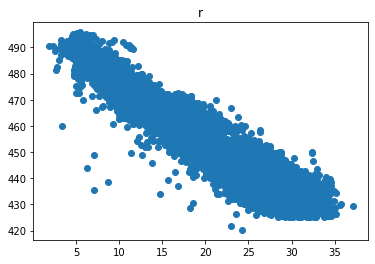

In [34]:
X=df['AT']
Y=df['PE']
plt.scatter(X,Y)
plt.title('r')

Text(0.5, 1.0, 'R2')

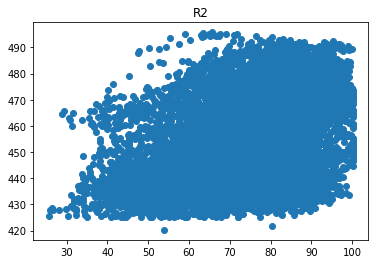

In [36]:
X=df['RH']
Y=df['PE']
plt.scatter(X,Y)
plt.title('R2')

## Define x and y

In [42]:
x=df.drop(['PE'],axis=1).values
y=df['PE'].values

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0) 

## Train the modal on the training set

In [49]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [50]:
lm.fit(X_train,y_train)

LinearRegression()

## Predict the test set result

In [54]:
y_pred=lm.predict(X_test)
print(y_pred)

[447.65825114 431.14657379 443.04564714 ... 448.03444013 470.87438017
 465.86568375]


In [61]:
lm.predict([[14.96,41.76,1024.07,73.17]])

array([467.31766588])

In [62]:
df.head(2)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37


## Evaluate the model

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9285402001420873

## plot the result

Text(0.5, 1.0, 'Actual VS Predicted')

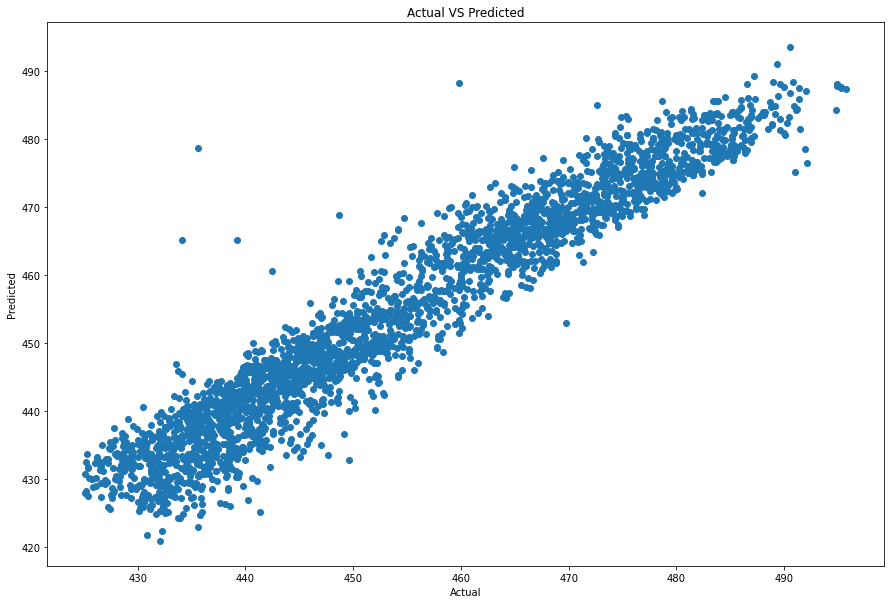

In [66]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual VS Predicted")

## Thanks